The data are simulated based on real hospital administrative data for England called Hospital Episodes Statistics.

The simulated data extract contains a random sample of emergency (unplanned) admissions for heart failure.

In [25]:
# Importing the necessary libraries

import lifelines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
pd.options.display.max_columns = 100

In [3]:
# Importing the dataset:
df = pd.read_csv('heart-data.csv')

In [7]:
df.head()

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,diabetes,hypertension,ihd,mental_health,arrhythmias,copd,obesity,pvd,renal_disease,valvular_disease,metastatic_cancer,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,1,0,2,90,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,4,0,0,0,0,2.0,NaN,416
1,2,0,10,74,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,9,1,0,0,0,4.0,1.0,648
2,3,0,3,83,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3.0,1.0,466
3,4,0,1,79,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,9,2,1,1,0,5.0,1.0,441
4,5,0,17,94,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,2.0,1.0,371


In [24]:
print('The dataset consist of following number of patients: ', df.shape[0])

The dataset consist of following number of patients:  1000


In [9]:
# To initialise Kaplan Meier Plot Fitter

kmf = lifelines.KaplanMeierFitter()

Follow up time i.e Time Since the admission to hospital (fu_time) is considered as survival time for analysis

The failure event in this case is the death of the patient.

We have assumed that censoring of the patients do not occur.

In [8]:
T = df['fu_time']
E = df['death']

In [10]:
kmf.fit(T , event_observed= E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1000 total observations, 508 right-censored observations>

Text(0.5, 0, 'Time')

<Figure size 1440x1440 with 0 Axes>

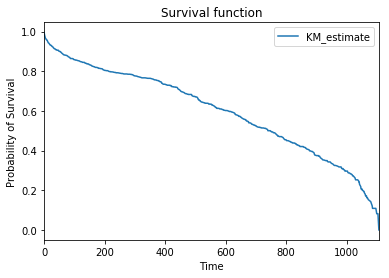

In [18]:
kmf.survival_function_.plot()
plt.title('Survival function')
plt.ylabel('Probability of Survival')
plt.xlabel('Time')

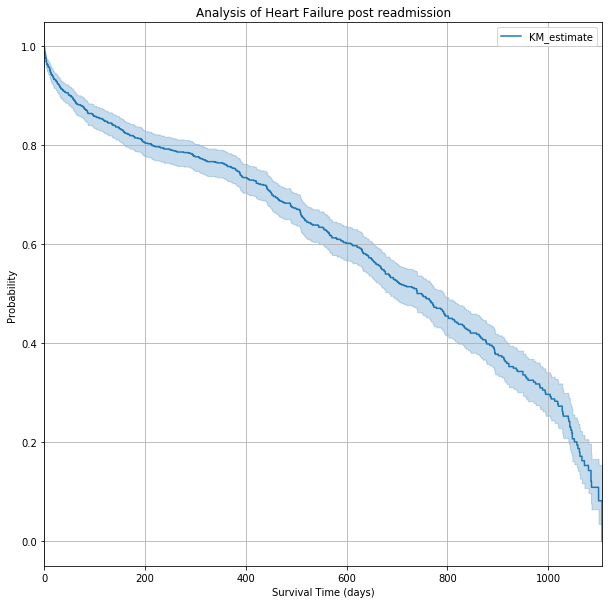

In [31]:
plt.figure(figsize=(10,10))
kmf.plot()
plt.grid()
plt.xlabel('Survival Time (days)')
plt.ylabel('Probability')
plt.title('Analysis of Heart Failure post readmission')
plt.legend()

In [29]:
print('The median survival time for an event to occur is ', kmf.median_survival_time_)

The median survival time for an event to occur is  749.0


In [21]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)

In [22]:
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,685.0,793.0


Estimating KM Plot for Gender

Encodings in Data

Male : 1
Female : 2

In [35]:
df['gender'].value_counts()

1    548
2    452
Name: gender, dtype: int64

(0, 1)

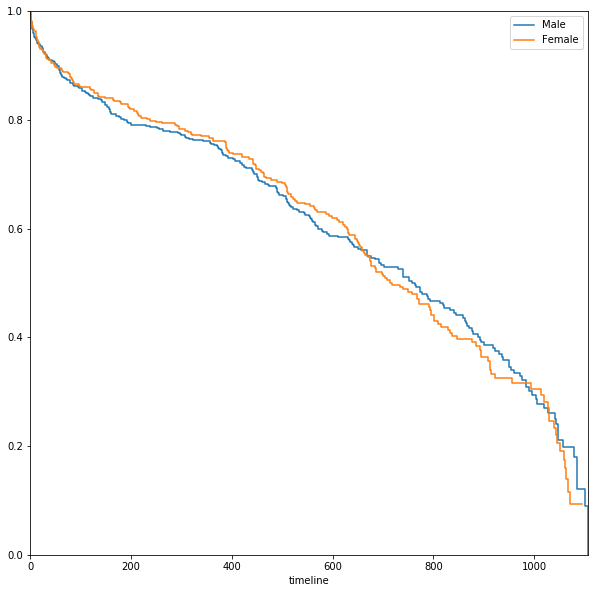

In [43]:
plt.figure(figsize=(10,10))


ax = plt.subplot(111)
male = df['gender'] == 1
female = df['gender'] == 2

kmf.fit(T[male], event_observed=E[male], label="Male")
kmf.plot(ax=ax , ci_alpha = 0)

kmf.fit(T[female], event_observed=E[female], label="Female")
kmf.plot(ax=ax , ci_alpha = 0)

plt.ylim(0, 1)

Applying Log Rank Test on KM Plot for Gender

In [47]:
from lifelines.statistics import logrank_test

results = logrank_test(durations_A= T[male],durations_B= T[female], event_observed_A= E[male], event_observed_B= E[female])

results.print_summary()
print(results.p_value)        
#print(results.test_statistic) 

0.7745517906617979
